In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



```
# This is formatted as code
```

# Heart Failure Prediction

---


The reason for this project is the prediction of heart failures from given parameters

In [ ]:
heart = pd.DataFrame(pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv"))
heart.head()

It will see the nulls in the dataset and clean data that cannot be used

In [ ]:
heart.isnull().sum()

As the dataset is already clean, we would have to continue with the next part, which is to create a neural network for the prediction of heart failures, but first we will do a shuffle to mix in the dataframe.


In [ ]:
heart=shuffle(heart)
heart

Now we have to separate the prediction column from the input values

In [ ]:
y=heart["DEATH_EVENT"]
X=heart.drop(labels=["DEATH_EVENT"],axis=1)

In [ ]:
y.head()

In [ ]:
X.head()

Now the X data is normalized in order to make the neural network better optimized

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

Now we separate the training and testing data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

In [ ]:
X_train.shape[1]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, activation = 'relu',
 input_dim = X_train.shape[1]))
model.add(keras.layers.Dense(24, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [ ]:
import datetime, os
logdir = os.path.join("log",
 datetime.datetime.now().
strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,
 histogram_freq = 1)

In [ ]:
r = model.fit(X_train, y_train, batch_size = 32, epochs = 50,
 validation_split = 0.2,
 callbacks = [tensorboard_callback])

In [ ]:
test_scores = model.evaluate(X_test, y_test)
print('Test Loss: ', test_scores[0])
print('Test accuracy: ', test_scores[1] * 100)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
y_pred

In [ ]:
cf = confusion_matrix(y_test, y_pred)
cf

To read the matrix above here is an example

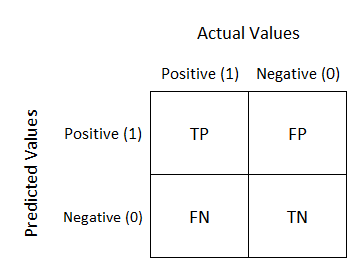